In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Decision Tree

In [2]:
read=pd.read_csv("Social_Network_Ads.csv")

In [3]:
read.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x=read.iloc[:,[2,3]]
y=read.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/4,random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier = classifier.fit(xtrain,ytrain)
ypred=classifier.predict(xtest)

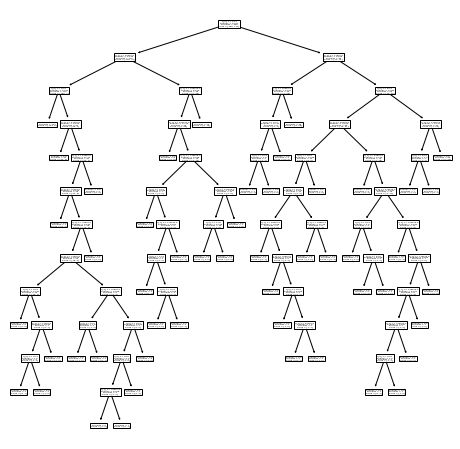

In [7]:
plt.figure(figsize=(8,8))
plot_tree(classifier)
plt.show()

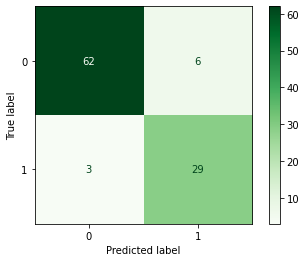

In [8]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score
plot_confusion_matrix(classifier,xtest,ytest,cmap="Greens")
plt.show()

In [9]:
accuracy_score(ytest,ypred)

0.91

# KNN

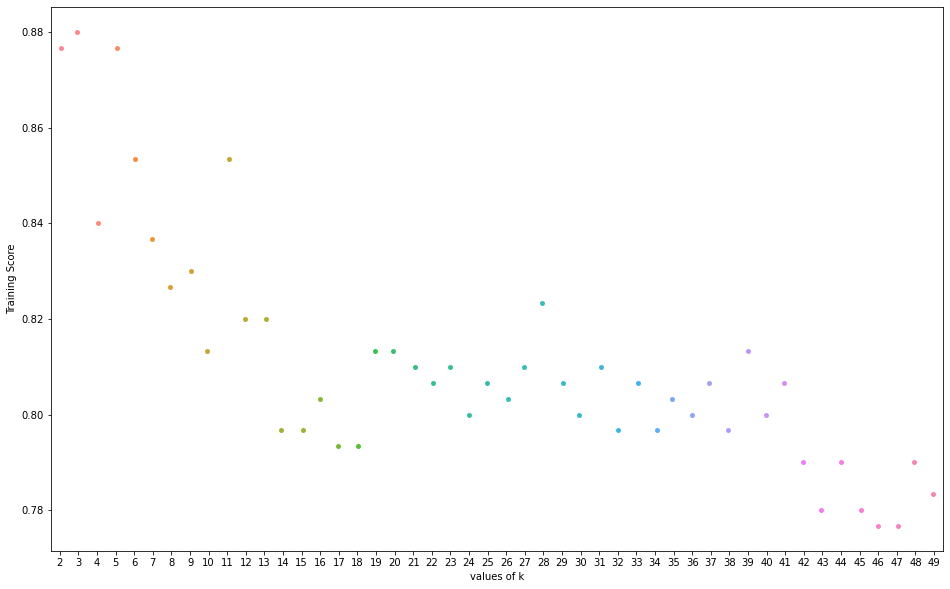

In [10]:
from sklearn.neighbors import KNeighborsClassifier
K = []
training = []
test = []
scores = {}
  
for k in range(2, 50):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(xtrain, ytrain)
  
    training_score = clf.score(xtrain, ytrain)
    test_score = clf.score(xtest, ytest)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
plt.figure(figsize=(16,10))
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score') 
plt.show()

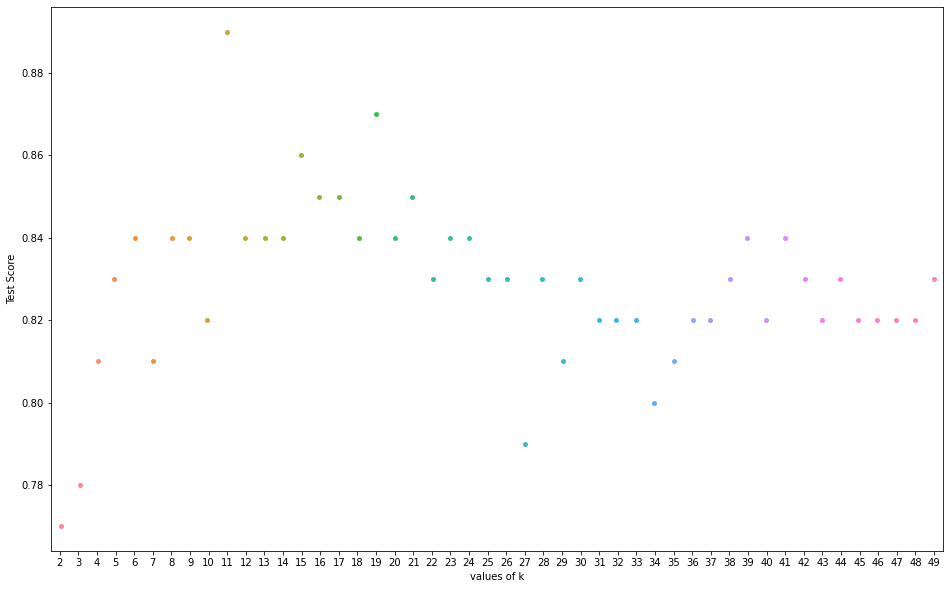

In [11]:
plt.figure(figsize=(16,10))
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

In [12]:
ypredict = clf.predict(xtest)

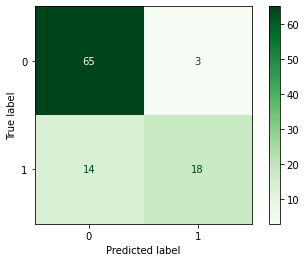

In [13]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score
plot_confusion_matrix(clf,xtest,ytest,cmap="Greens",)
plt.show()

In [14]:
accuracy_score(ytest,ypredict)

0.83